# Exercício avaliativo

In [1]:
import io
import sqlite3
import pandas as pd

Neste exercício, vamos trabalhar com dados de uma empresa fictícia de consultoria denominada IBD.

**Considere o seguinte esquema relacional**:

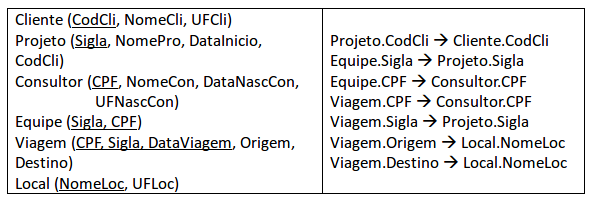

**assumindo as seguintes premissas**:

- Nenhum atributo admite valor nulo.
- Apenas as seguintes chaves primárias são numéricas: `Cliente.CodCli`, `Consultor.CPF`

# Download dos dados da empresa

In [2]:
!wget --quiet -P /tmp/ https://raw.githubusercontent.com/filipefbn/jupyter_intro_class_ibd/master/data/exercicio.sql

# Carregando o banco

In [3]:
conn = sqlite3.connect('/tmp/consult.db')
cursor = conn.cursor()

f = io.open('/tmp/exercicio.sql', 'r', encoding='utf-8')
sql = f.read()
cursor.executescript(sql)

# Consultas

Responda as perguntas abaixo através de consultas SQL no banco de dados carregado. Caso tenha alguma dúvida sobre `sqlite3` e `pandas`, revisite as **seções 2 e 3**  do [Tutorial: SQL, Google Colab e Jupyter Notebooks](https://colab.research.google.com/drive/1DnDPcgdq6YcBI3AnzRRCfMRvp2nU3vAV?usp=sharing).

O formato da célula de resposta pode ser visto na resposta da consulta exemplo 0.

**Você pode usar mais de uma célula para responder, desde que a última célula antes da próxima consulta contenha a resposta final no formato mostrado no exemplo 0.**

## 0. [exemplo/não alterar]  Qual o nome e o número de viagens dos 5 consultores que mais viajaram a trabalho pela empresa IBD?

In [4]:
query = """
SELECT
  C.NomeCon as Nome, COUNT(C.CPF) as NViagens
FROM
  Consultor as C
INNER JOIN Viagem as V
  ON C.CPF = V.CPF
GROUP BY
  C.CPF
ORDER BY
  NViagens DESC
LIMIT 5
"""

df = pd.read_sql_query(query, conn)
df

Nome  NViagens
0    Melissa Carvalho Cunha         4
1    Rodrigo Araujo Cardoso         3
2  Larissa Fernandes Araujo         3
3    Diogo Cavalcanti Rocha         2
4     Lucas Fernandes Costa         1

## 1. Que consultores (CPF, nome e estado de nascimento) não nasceram em São Paulo (SP)?

In [5]:
query = """
SELECT
  C.CPF as CPF, C.NomeCon as nome, C.UFNascCon as "estado de nascimento"
FROM
  Consultor as C
WHERE
  C.UFNascCon != 'SP'
"""

df = pd.read_sql_query(query, conn)
df

CPF                       nome estado de nascimento
0  13414263351      Samuel Araujo Azevedo                   PR
1  71960563530     Diogo Cavalcanti Rocha                   PB
2   3074973994       Julieta Maciel Sousa                   RJ
3  29762035631          Caio Dias Ribeiro                   MG
4  17787063122   Larissa Fernandes Araujo                   MG
5  31266012516     Leonor Goncalves Rocha                   MG
6  85726311353  Brenda Oliveira Goncalves                   TO

## 2. Que projetos (sigla e nome) não são do cliente "Facebook"?

In [6]:
query = """
SELECT
  P.Sigla as sigla, P.NomePro as nome
FROM
  Projeto as P
WHERE NOT EXISTS (
  SELECT *
  FROM Cliente as C
  WHERE C.NomeCli = 'Facebook' AND P.CodCli = C.CodCli
)
"""

df = pd.read_sql_query(query, conn)
df

sigla                                               nome
0     NMT  Neural Machine Translation (Chinês para Portug...
1  Search                        Otimização Sistema de Busca
2    Spam                           Detecção de Spam (Gmail)
3    Fake                              Detecção de Fake News
4     SDC                                   Self Driving Car
5     Pay                               Sistema de Pagamento
6  RecSys                            Sistema de Recomendação
7   Fraud                                 Detecção de Fraude

# 3. Para que UFs viajaram os consultores que participam do projeto de sigla "RecSys"?

In [7]:
query = """
SELECT
  L.UFLoc as UFs
FROM
  Local as L,  Viagem as V, Projeto as P
WHERE
  V.Destino = L.NomeLoc AND P.Sigla = V.Sigla AND P.NomePro = "RecSys"
"""
df = pd.read_sql_query(query, conn)
df

Empty DataFrame
Columns: [UFs]
Index: []

## 4. Que projetos (sigla e nome) não têm equipe?

In [8]:
query = """
SELECT
  P.Sigla as sigla, P.NomePro as nome
FROM
  Projeto as P
WHERE NOT EXISTS (
SELECT
  *
FROM
  Equipe as E
WHERE
  E.Sigla = P.Sigla
)
"""
df = pd.read_sql_query(query, conn)
df

sigla                         nome
0  Search  Otimização Sistema de Busca
1    Fake        Detecção de Fake News
2     SDC             Self Driving Car

## 5. Que projetos (sigla e nome) não têm em sua equipe consultores nascidos antes de 1987?


In [9]:
query = """
SELECT
  P.Sigla as sigla, P.NomePro as nome
FROM
  Projeto as P
WHERE NOT EXISTS (
SELECT
  *
FROM
  Equipe as E, Consultor as C
WHERE
  E.Sigla = P.Sigla AND E.CPF = C.CPF AND C.DataNascCon = 1987
)
"""
df = pd.read_sql_query(query, conn)
df

sigla                                               nome
0       NMT  Neural Machine Translation (Chinês para Portug...
1    Search                        Otimização Sistema de Busca
2      Spam                           Detecção de Spam (Gmail)
3      Fake                              Detecção de Fake News
4       SDC                                   Self Driving Car
5       Pay                               Sistema de Pagamento
6    RecSys                            Sistema de Recomendação
7  WhatsApp                    Cliente desktop para o WhatsApp
8        VR                            Hardware para Oculus VR
9     Fraud                                 Detecção de Fraude

## 6. Que consultores (CPF e nome) viajaram por seu estado natal (origem ou destino)?

In [10]:
query = """
SELECT
  C.CPF as CPF, C.NomeCon as nome
FROM
  Consultor as C
WHERE EXISTS (
SELECT
   *
FROM
   Viagem as V, Local as L
WHERE
   L.UFLoc = C.UFNascCon AND (V.Origem = L.NomeLoc OR V.Destino = L.NomeLoc) AND C.CPF = V.CPF
)
"""
df = pd.read_sql_query(query, conn)
df

CPF                      nome
0  44434353608    Melissa Carvalho Cunha
1  62465487841     Lucas Fernandes Costa
2  29762035631         Caio Dias Ribeiro
3  34646193892    Rodrigo Araujo Cardoso
4  17787063122  Larissa Fernandes Araujo

## 7. Para que locais não houve nenhuma viagem?



In [11]:
query = """
SELECT
  *
FROM
  Local as L
WHERE NOT EXISTS (
SELECT
   *
FROM
   Viagem as V
WHERE
   V.Origem = L.NomeLoc OR V.Destino = L.NomeLoc
)
"""
df = pd.read_sql_query(query, conn)
df

NOMELOC UFLOC
0   Amazon    WA
1  Netflix    CA
2  Spotify    NY

## 8. Em que projetos (sigla e nome) foram realizadas viagens para a California (CA) desde o início de 2019?

In [12]:
query = """
SELECT
  P.Sigla as sigla, P.NomePro as nome
FROM
  Projeto as P
WHERE EXISTS (
SELECT
  *
FROM
  Viagem as V, Local as L
WHERE
  L.NomeLoc = V.Destino AND L.UFLoc = 'CA' AND CAST(DATAVIAGEM AS DATE) >= 2019 AND P.Sigla = V.Sigla
)
"""
df = pd.read_sql_query(query, conn)
df

sigla                             nome
0  WhatsApp  Cliente desktop para o WhatsApp
1        VR          Hardware para Oculus VR

## 9. Que consultores (CPF e nome) viajaram por um projeto de cuja equipe não fazem parte?

In [13]:
query = """
SELECT DISTINCT
  C.CPF as CPF, C.NomeCon as nome
FROM
  Consultor as C, Equipe as E
WHERE
  C.CPF = E.CPF AND EXISTS (
    SELECT
      *
    FROM
      Viagem as V, Projeto as P
    WHERE
      V.Sigla = P.Sigla AND V.CPF = C.CPF AND E.Sigla != V.Sigla
  )
"""
df = pd.read_sql_query(query, conn)
df

CPF                      nome
0  44434353608    Melissa Carvalho Cunha
1  71960563530    Diogo Cavalcanti Rocha
2  17787063122  Larissa Fernandes Araujo
3  31266012516    Leonor Goncalves Rocha
4  34646193892    Rodrigo Araujo Cardoso

## 10. Que consultores (CPF e nome) não estão em nenhuma equipe de projeto que tenha iniciado em 2019?


In [14]:
query = """
SELECT
  C.CPF as CPF, C.NomeCon as nome
FROM
  Consultor as C
WHERE NOT EXISTS (
SELECT
  *
FROM
  Equipe as E, Projeto as P
WHERE
  E.Sigla = P.Sigla AND CAST(P.DataInicio AS DATE) = 2019 AND C.CPF = E.CPF
)
"""
df = pd.read_sql_query(query, conn)
df

CPF                       nome
0  13414263351      Samuel Araujo Azevedo
1  71960563530     Diogo Cavalcanti Rocha
2  44434353608     Melissa Carvalho Cunha
3  62465487841      Lucas Fernandes Costa
4   3074973994       Julieta Maciel Sousa
5  29762035631          Caio Dias Ribeiro
6  34646193892     Rodrigo Araujo Cardoso
7  17787063122   Larissa Fernandes Araujo
8  31266012516     Leonor Goncalves Rocha
9  85726311353  Brenda Oliveira Goncalves